<a href="https://colab.research.google.com/github/uijun33/frontpage-uijun33.github.io/blob/main/MSA_Python_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygame


In [9]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys

In [10]:
# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [ ]:
import pygame
import sys
import random

pygame.init()

# Screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600

# Colors
WHITE = (255, 255, 255)

# Create the screen
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("1945 Air Force Game")

# Load background image
background_image = pygame.image.load("background.jpg").convert()

# Load plane image
plane_image = pygame.image.load("Plane.png").convert_alpha()

# Load enemy plane image
enemy_image = pygame.image.load("prey.png").convert_alpha()

# Load game over image
game_over_image = pygame.image.load("prey.png").convert()

class PlayerPlane(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = plane_image
        self.rect = self.image.get_rect()
        self.rect.centerx = SCREEN_WIDTH // 2
        self.rect.bottom = SCREEN_HEIGHT - 10
        self.speed_x = 0

    def update(self):
        self.rect.x += self.speed_x
        if self.rect.left < 0:
            self.rect.left = 0
        if self.rect.right > SCREEN_WIDTH:
            self.rect.right = SCREEN_WIDTH

class EnemyPlane(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = enemy_image
        self.rect = self.image.get_rect()
        self.rect.x = random.randint(0, SCREEN_WIDTH - self.rect.width)
        self.rect.y = random.randint(-SCREEN_HEIGHT, -self.rect.height)
        self.speed_y = random.randint(1, 3)

    def update(self):
        self.rect.y += self.speed_y
        if self.rect.top > SCREEN_HEIGHT:
            self.rect.x = random.randint(0, SCREEN_WIDTH - self.rect.width)
            self.rect.y = random.randint(-SCREEN_HEIGHT, -self.rect.height)
            self.speed_y = random.randint(1, 3)

def check_collisions():
    return pygame.sprite.spritecollide(player, enemy_group, True)

def show_game_over_screen():
    screen.blit(game_over_image, (0, 0))
    pygame.display.flip()
    pygame.time.wait(2000)  # Display the game over screen for 2 seconds

player = PlayerPlane()
all_sprites = pygame.sprite.Group()
all_sprites.add(player)

enemy_group = pygame.sprite.Group()
for _ in range(10):  # Spawn 10 enemy planes
    enemy = EnemyPlane()
    all_sprites.add(enemy)
    enemy_group.add(enemy)

clock = pygame.time.Clock()
score = 0

try:
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()

        keys = pygame.key.get_pressed()
        player.speed_x = (keys[pygame.K_RIGHT] - keys[pygame.K_LEFT]) * 5

        all_sprites.update()

        if check_collisions():
            show_game_over_screen()

        # Draw the background and all sprites on the screen
        screen.blit(background_image, (0, 0))
        all_sprites.draw(screen)

        # Update the screen
        pygame.display.flip()
        clock.tick(60)

except Exception as e:
    # Print the traceback in case of an exception
    import traceback
    traceback.print_exc()
    pygame.quit()
    sys.exit()

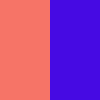